<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***1. Defining Problem Statement and Analysing basic metrics ***


Business Problem


Analyze the data and generate insights that could help Netflix in deciding which type of
shows/movies to produce and how they can grow the business in different countries

###Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

###Loading The Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/netflix .csv')



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###let's check first 5 rows of data

In [ ]:
df.head()

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The dataset contains over 8807 entries and 12 columns. After a quick view of the data frames, it looks
like a typical movie/TVshows data frame without ratings. We can also see that there are NaN values
in some columns.

#**2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

###Getting all attributes/variables of df dataset

In [49]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_numeric', 'num_genres', 'num_countries', 'month_added',
       'month_name_added', 'year_added', 'num_directors', 'num_cast'],
      dtype='object')

###shape of the data

In [50]:
df.ndim

2

In [51]:
df.shape

(8807, 20)

###Data Type of all the attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###Statistical Summary Before Data Cleaning:

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


###Missing Value Detection Data Profiling & Cleaning

In [52]:
df.isnull().any()

,0
show_id,False
type,False
title,False
director,False
cast,False
country,False
date_added,False
release_year,False
rating,False
duration,False


From the info, we know that there are 8807 entries and 12 columns to work with for this EDA. There
are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,10
release_year,0
rating,4
duration,3


4307

There are a total of 4307 null values across the entire dataset with 2634 missing points under
"director", 825 under "cast", 831 under "country", 11 under "date_added", 4 under "rating" and
3 under “duration ”. We will have to handle all null data points before we can dive into EDA and
modelling.


In [22]:
# Converting the 'date_added' column to datetime format
# Specify the format and handle errors
df["date_added"] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


In [23]:
# Extracting month, month name, and year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [34]:
# Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']

# Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

# Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

#**5. Missing Value & Outlier check (Treatment optional)**

###Filling Missing Values in 'country':

The missing values in the country column are filled with the mode (most frequent value) of that column.

In [4]:
# Filling missing values in the 'country' column with the mode value
df['country'] = df['country'].fillna(df['country'].mode()[0])

###Filling Missing Values in 'director':

For each unique combination of country and listed_in (genre), the mode of the director is computed. This ensures that missing directors are filled with the most frequent director for the same country and genre.


If any director values are still missing after this process, they are filled with the global mode of the director column.


In [8]:
# Step 2: Compute mode for 'director' grouped by 'country' and 'listed_in'
# Ensure a fallback for groups with no valid data
mode_director = df.groupby(['country', 'listed_in'])['director'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Step 3: Replace missing 'director' values based on the group mode
df['director'] = df.apply(
    lambda row: mode_director.get((row['country'], row['listed_in']), None)
    if pd.isnull(row['director']) else row['director'],
    axis=1
)

# Step 4: Fill remaining 'director' nulls with the global mode
df['director'] = df['director'].fillna(df['director'].mode()[0])


###Handling Missing Values in Other Object, Float, and Date Columns:

The code loops over all columns with data types object, float64, and datetime64, and fills the missing values with the mode of each respective column.

In [ ]:
for i in df.select_dtypes(include= ['object','float64','datetime64[ns]'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)

In [45]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1
"TV Comedies, TV Dramas, TV Horror",1
"Children & Family Movies, Comedies, LGBTQ Movies",1


<bound method Series.unique of 0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              7982 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_numeric  8804 non-null   float64       
 13  num_genres        8807 non-null   int64         
 14  num_countries     8807 n

In [31]:
for i in df.select_dtypes(include= ['object','float64','datetime64[ns]'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)

<ipython-input-31-f5fa914077dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for i in df.select_dtypes(include= ['object','float64','datetime64[ns]'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)
<ipython-input-31-f5fa914077dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [32]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [36]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,num_genres,num_countries,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,1,1,9.0,September,2021.0
1,s2,TV Show,Blood & Water,Vijay S. Bhanushali,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,3,1,9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,3,1,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,Vijay S. Bhanushali,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2,1,9.0,September,2021.0
4,s5,TV Show,Kota Factory,Vijay S. Bhanushali,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,3,1,9.0,September,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,3,1,11.0,November,2019.0
8803,s8804,TV Show,Zombie Dumb,Vijay S. Bhanushali,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,3,1,7.0,July,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,2,1,11.0,November,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,2,1,1.0,January,2020.0


In [35]:
df.describe()

,date_added,release_year,duration_numeric,num_genres,num_countries,month_added,year_added
count,8807,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000
mean,2019-05-25 13:17:35.024412160,2014.180198,69.823436,2.194050,1.231975,6.657204,2018.889179
min,2008-01-01 00:00:00,1925.000000,1.000000,1.000000,1.000000,1.000000,2008.000000
25%,2018-04-30 12:00:00,2013.000000,2.000000,2.000000,1.000000,4.000000,2018.000000
50%,2019-07-26 00:00:00,2017.000000,88.000000,2.000000,1.000000,7.000000,2019.000000
75%,2020-08-18 00:00:00,2019.000000,106.000000,3.000000,1.000000,10.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,312.000000,3.000000,12.000000,12.000000,2021.000000
std,NaN,8.819312,50.822055,0.784341,0.668818,3.412481,1.559256


In [ ]:
#How many Movies & TV Shows are in the dataset?

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
type_counts = df.groupby('type')['type'].count()
type_counts

,type
type,
Movie,6131
TV Show,2676


In [ ]:
type_counts = df.groupby('type')['type'].count().reset_index(name = 'count')
type_counts

,type,count
0,Movie,6131
1,TV Show,2676


#univariate

###Release Year Trends:

A histogram of release years shows that Netflix's content library has rapidly expanded in recent years. The majority of titles were added between 2010 and 2020, with a significant rise starting around 2015. this indicates Netflix's aggressive push in producing or acquiring new content during the streaming boom.

sns.histplot in Seaborn is used to visualize the distribution of a numerical variable.

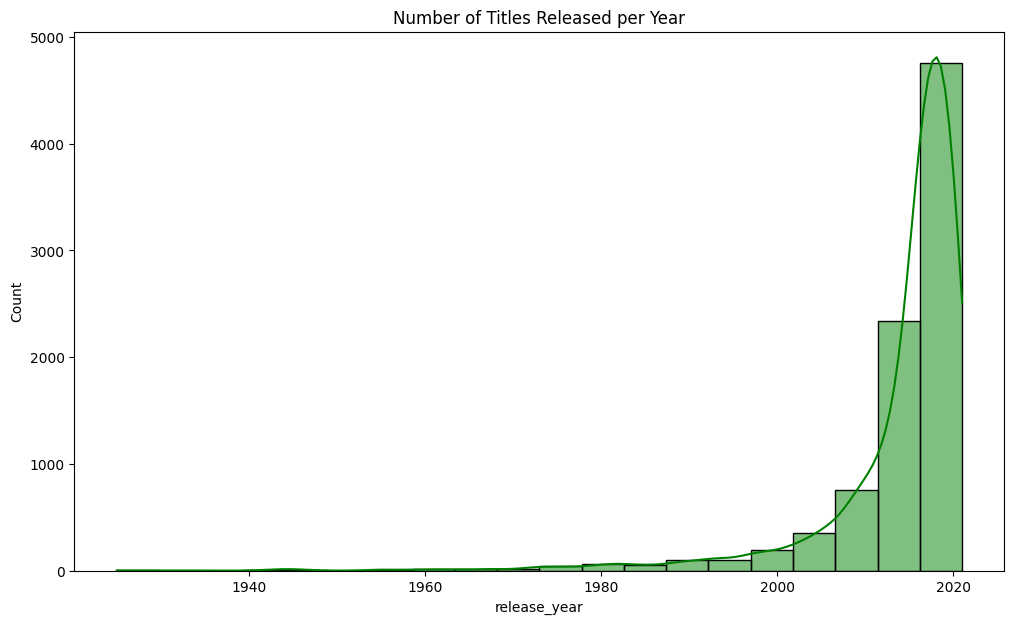

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(data = df, x = 'release_year', kde=True, bins = 20, color = 'green')
plt.title('Number of Titles Released per Year')
plt.show()


###Netflix Content By Type:

Anylising entire Netflix dataset consisting of both movies and shows. Lets compare the totals no. of movies and shows in this dataste to knwo which one is the majority.

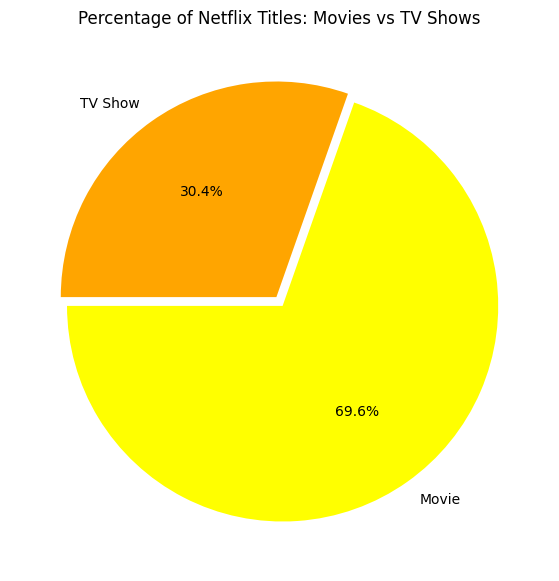

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Percentage of Netflix Titles: Movies vs TV Shows")
graph = plt.pie(df.type.value_counts(), explode= (0.025, 0.025),
                labels = df.type.value_counts().index, colors = ['yellow','orange'], autopct = '%1.1f%%',
                startangle = 180)

###Rating Distribution

The count plot show cases the distribution of ratings, with 'TV-MA' having the highest count at around 3200, followed by 'TV-14' with approximately 220 counts.

This reveals that the majority of the content is rated 'TV-MA', indicating a mature audience target. 'TV-14' and 'TV-PG' also have significant representation. suggesting a diverse range of content suitable for different age groups.

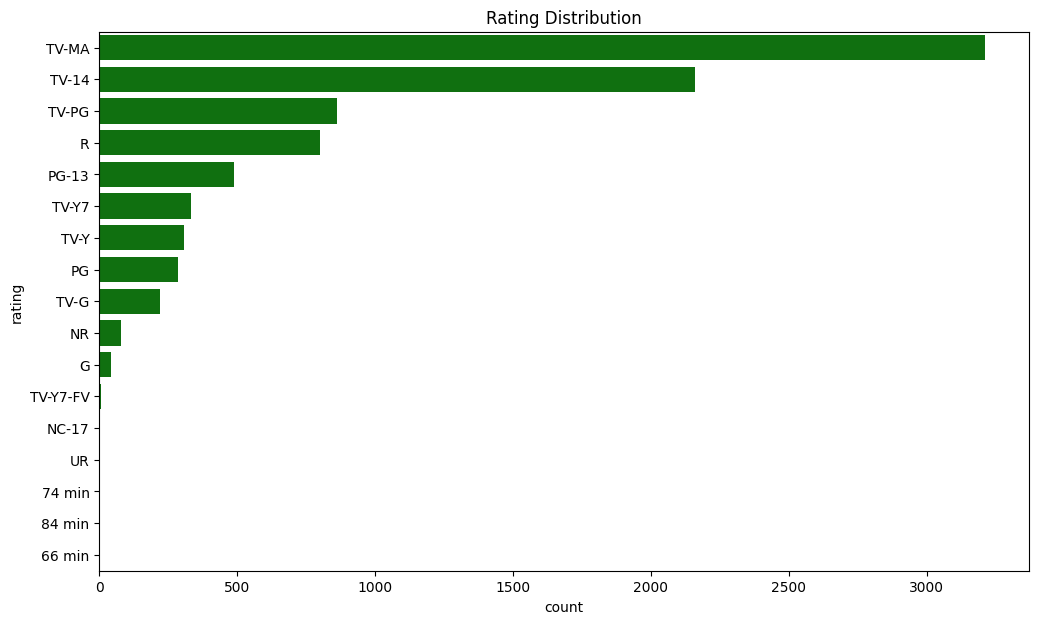

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot(y = 'rating', data = df, order = df['rating'].value_counts().index, color = 'green')
plt.title('Rating Distribution')
#add_data_labels(ax, type = 'bar')
plt.show()

#Bivariate Analysis


Moving on to bivariate analysis, we'll now explore relationship between pairs of variables with our netflix dataset. With focus on understanding how different attributes interact with each other

###Top 15 Countries by Show Type

Text(0.5, 1.0, 'Top 15 Countries by Type of Shows')

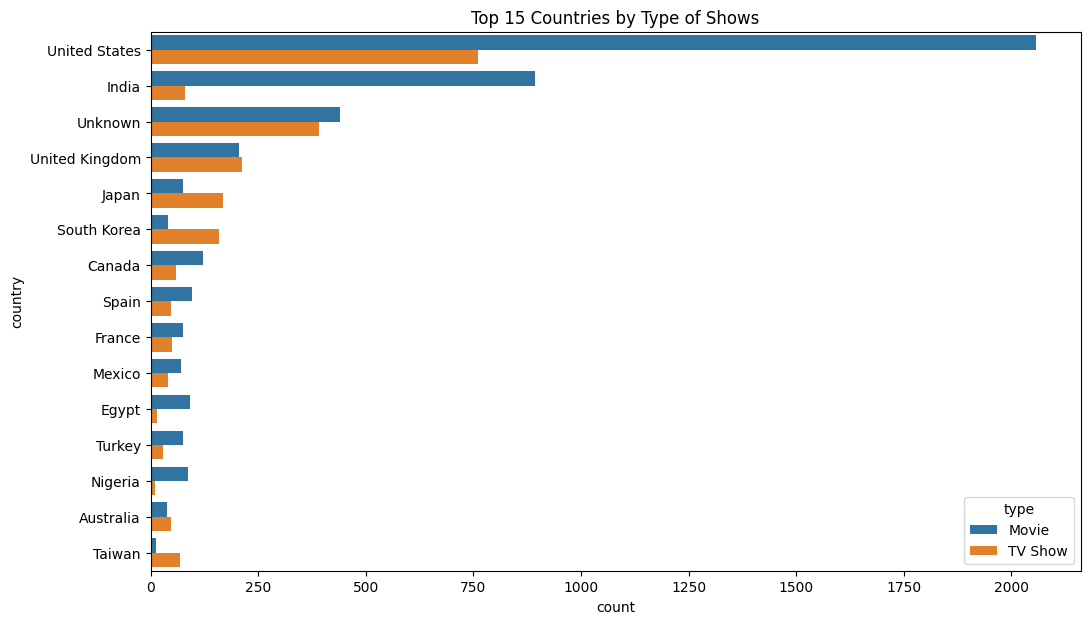

In [ ]:
# Generate clustered bar chart
plt.figure(figsize=(12,7))
ax = sns.countplot(y = 'country', hue = 'type', data = df, order =
                   df['country'].value_counts().index[:15])
plt.title('Top 15 Countries by Type of Shows')

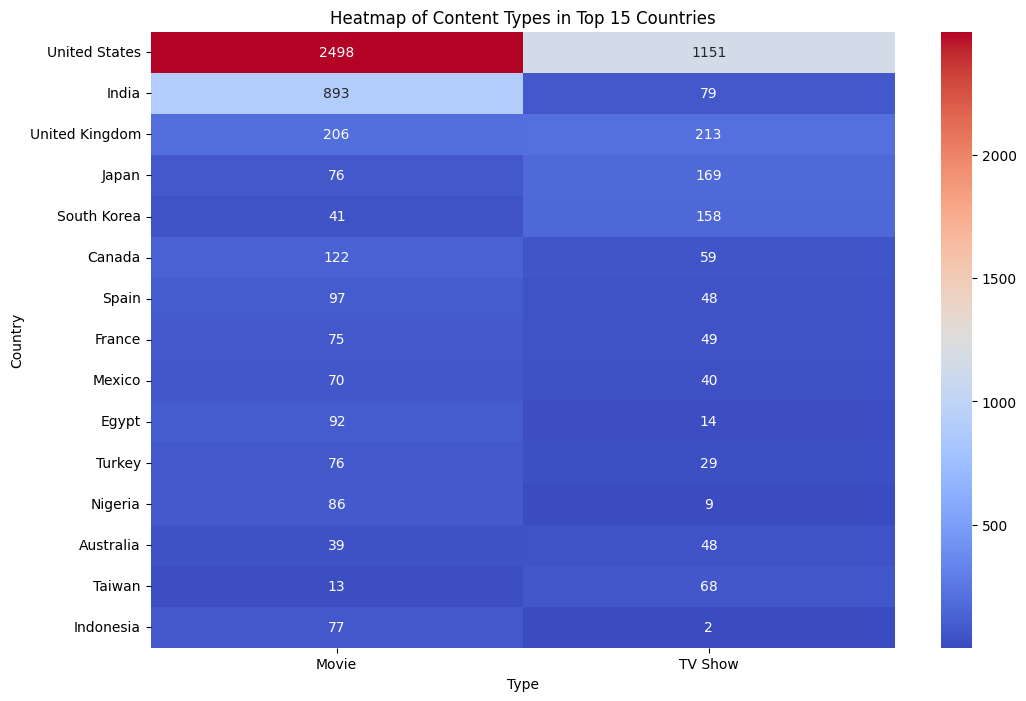

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data: Count occurrences of 'type' by 'country'
heatmap_data = df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Filter top 15 countries
top_countries = df['country'].value_counts().index[:15]
heatmap_data = heatmap_data.loc[top_countries]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Content Types in Top 15 Countries")
plt.xlabel("Type")
plt.ylabel("Country")
plt.show()


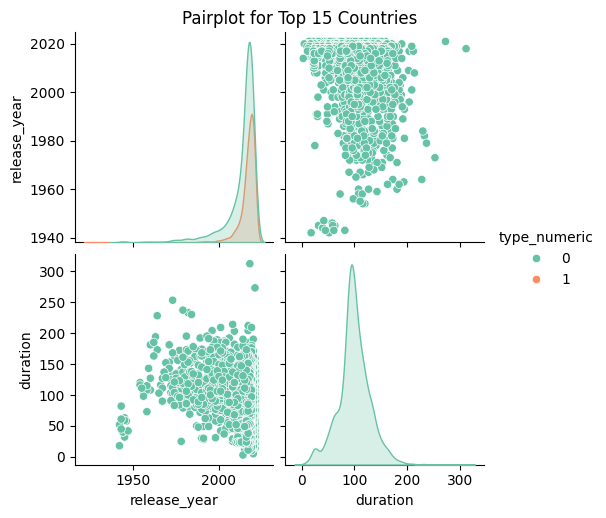

In [12]:
# Prepare data
pairplot_data = df.copy()

# Convert 'type' to numeric for pairplot (e.g., Movie = 0, TV Show = 1)
pairplot_data['type_numeric'] = pairplot_data['type'].map({'Movie': 0, 'TV Show': 1})

# Limit data to top 15 countries
pairplot_data = pairplot_data[pairplot_data['country'].isin(top_countries)]

# Select relevant columns
pairplot_data = pairplot_data[['release_year', 'type_numeric', 'duration', 'country']]

# Handle missing or non-numeric values (e.g., for 'duration')
pairplot_data['duration'] = pd.to_numeric(pairplot_data['duration'].str.replace(' min', ''), errors='coerce')

# Plot pairplot
sns.pairplot(pairplot_data, hue="type_numeric", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot for Top 15 Countries", y=1.02)
plt.show()


The analysis unveils the distribution of content types (movies vs TV shows) across different countries. Notably, the United States stands out with over 2000 movies and approximately 750 TV shows, showcasing a diverse range of content offerings. In contrast, India boasts nearly 900 movies but only around 80 TV shows, indicating a preference for movies over TV content in the region.
Similarly, UK exhibits a nearly equal distribution, with roughly 200 movies and approximately 210 TV shows. These findings underscore the importance of understanding regional preferences and can significantly inform acquisition strategies tailored to specific markets

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Michael Simon,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Michael Simon,David Attenborough,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Michael Simon,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Distribution of movie duration

In [ ]:
#filter the dataframe to only include movies
df_movies = df[df['type'] == 'Movie']

df_shows = df[df['type'] == 'TV show']

# for movies extract duration in mins

df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# for tv shows extract numeric value in seasons
df_shows['seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(14,6))


#plot for movies

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'type', y = 'duration_minutes', palette='Set2')

#title and labels
plt.title('Duration Distribution for Movies (Minutes)')




<ipython-input-52-40c3208b5546>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration_numeric', palette='Set2')


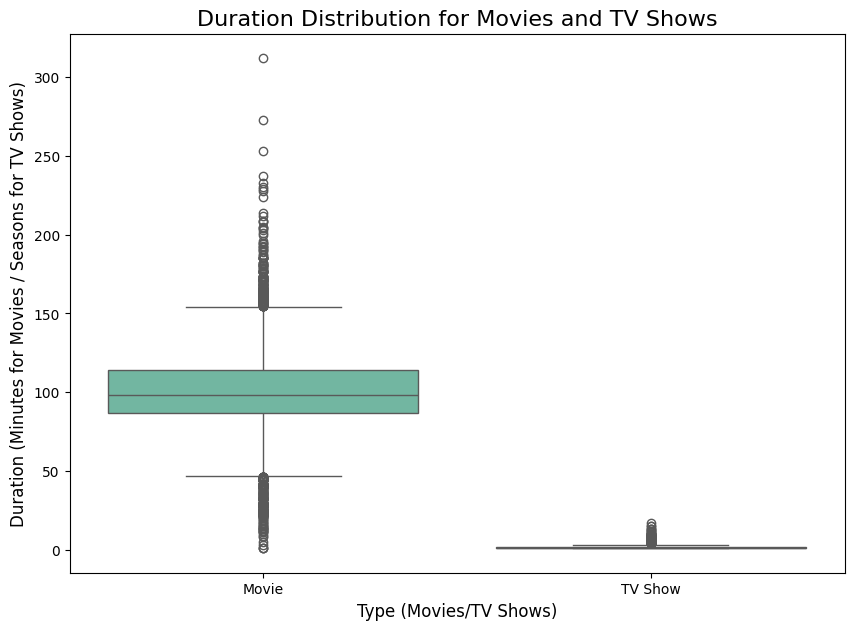

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the duration column
# Extract numeric values for Movies (duration in minutes) and TV Shows (number of seasons)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Step 2: Plot the boxplot for Movies and TV Shows
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='type', y='duration_numeric', palette='Set2')

# Add title and labels
plt.title('Duration Distribution for Movies and TV Shows', fontsize=16)
plt.xlabel('Type (Movies/TV Shows)', fontsize=12)
plt.ylabel('Duration (Minutes for Movies / Seasons for TV Shows)', fontsize=12)
plt.show()


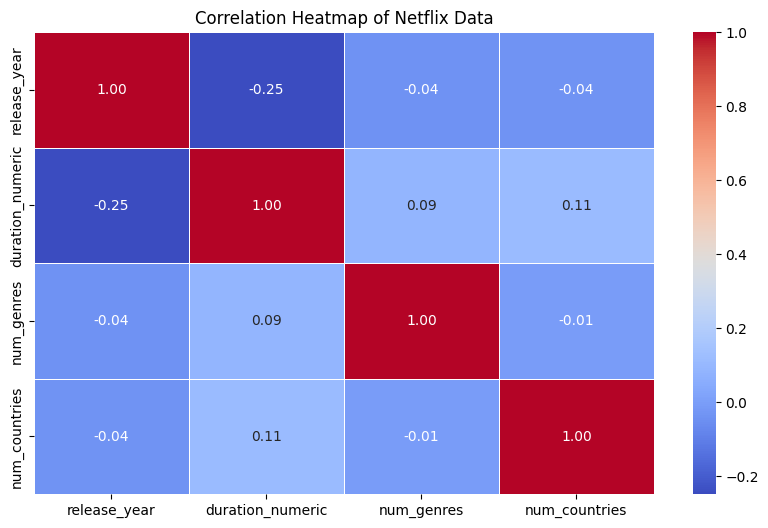

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing numerical data for correlation
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)  # Extract numeric duration
df['num_genres'] = df['listed_in'].str.split(',').apply(len)                # Number of genres
df['num_countries'] = df['country'].str.split(',').apply(len)               # Number of countries

# Selecting relevant columns
corr_data = df[['release_year', 'duration_numeric', 'num_genres', 'num_countries']]

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Netflix Data")
plt.show()


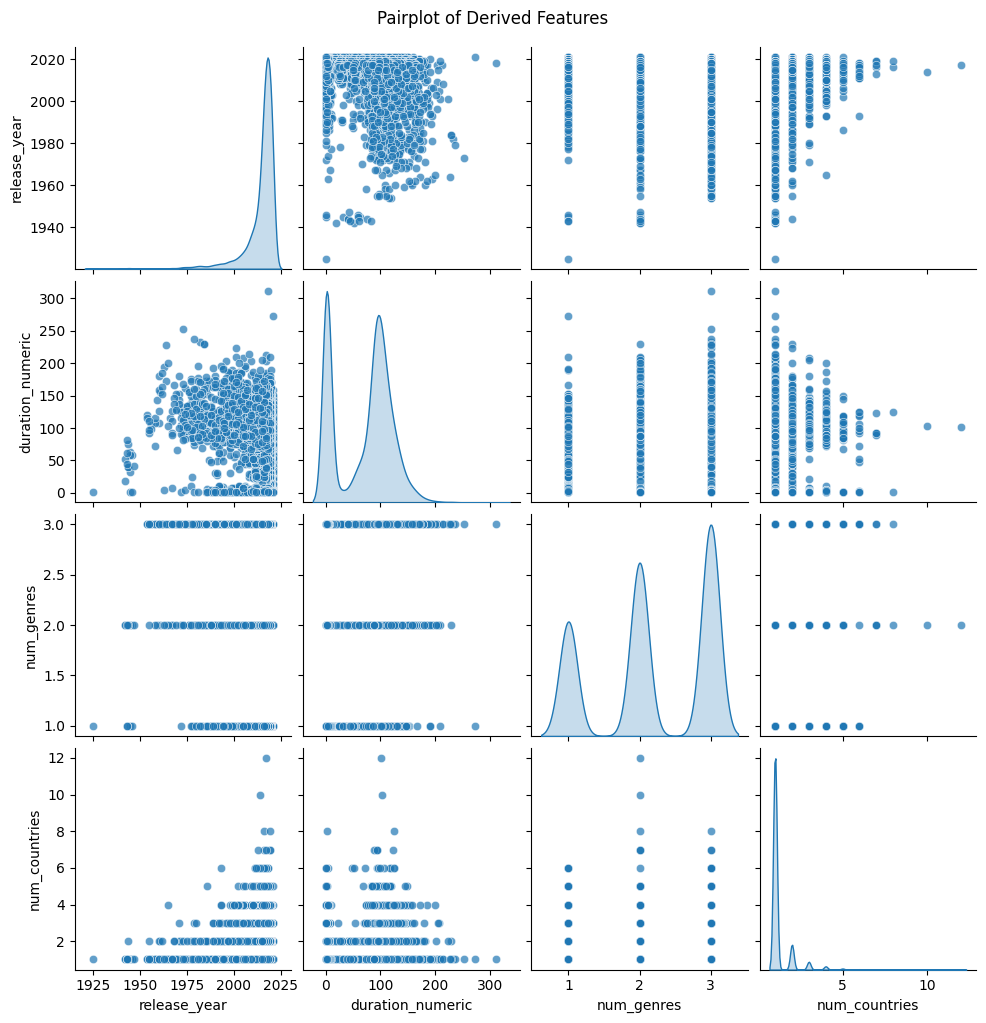

In [14]:
sns.pairplot(df[['release_year', 'duration_numeric', 'num_genres', 'num_countries']], diag_kind='kde', plot_kws={"alpha": 0.7})
plt.suptitle("Pairplot of Derived Features", y=1.02)
plt.show()


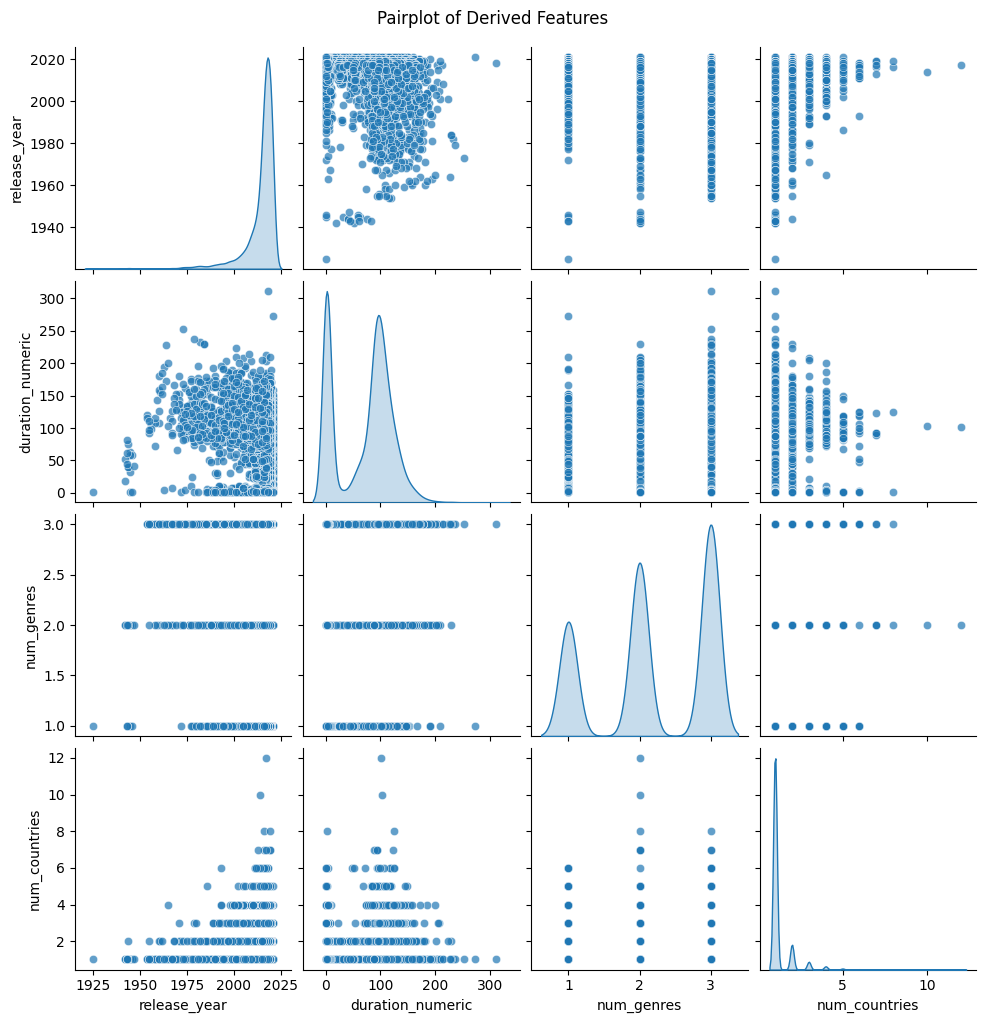

In [16]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating derived features
df['num_genres'] = df['listed_in'].str.split(',').apply(len)
df['num_countries'] = df['country'].str.split(',').apply(len)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Selecting relevant columns for pairplot
pairplot_features = df[['release_year', 'duration_numeric', 'num_genres', 'num_countries']]

# Dropping rows with NaN values for accurate visualization
pairplot_features = pairplot_features.dropna()

# Plotting the pairplot
sns.pairplot(pairplot_features, diag_kind='kde', plot_kws={"alpha": 0.7})
plt.suptitle("Pairplot of Derived Features", y=1.02)
plt.show()


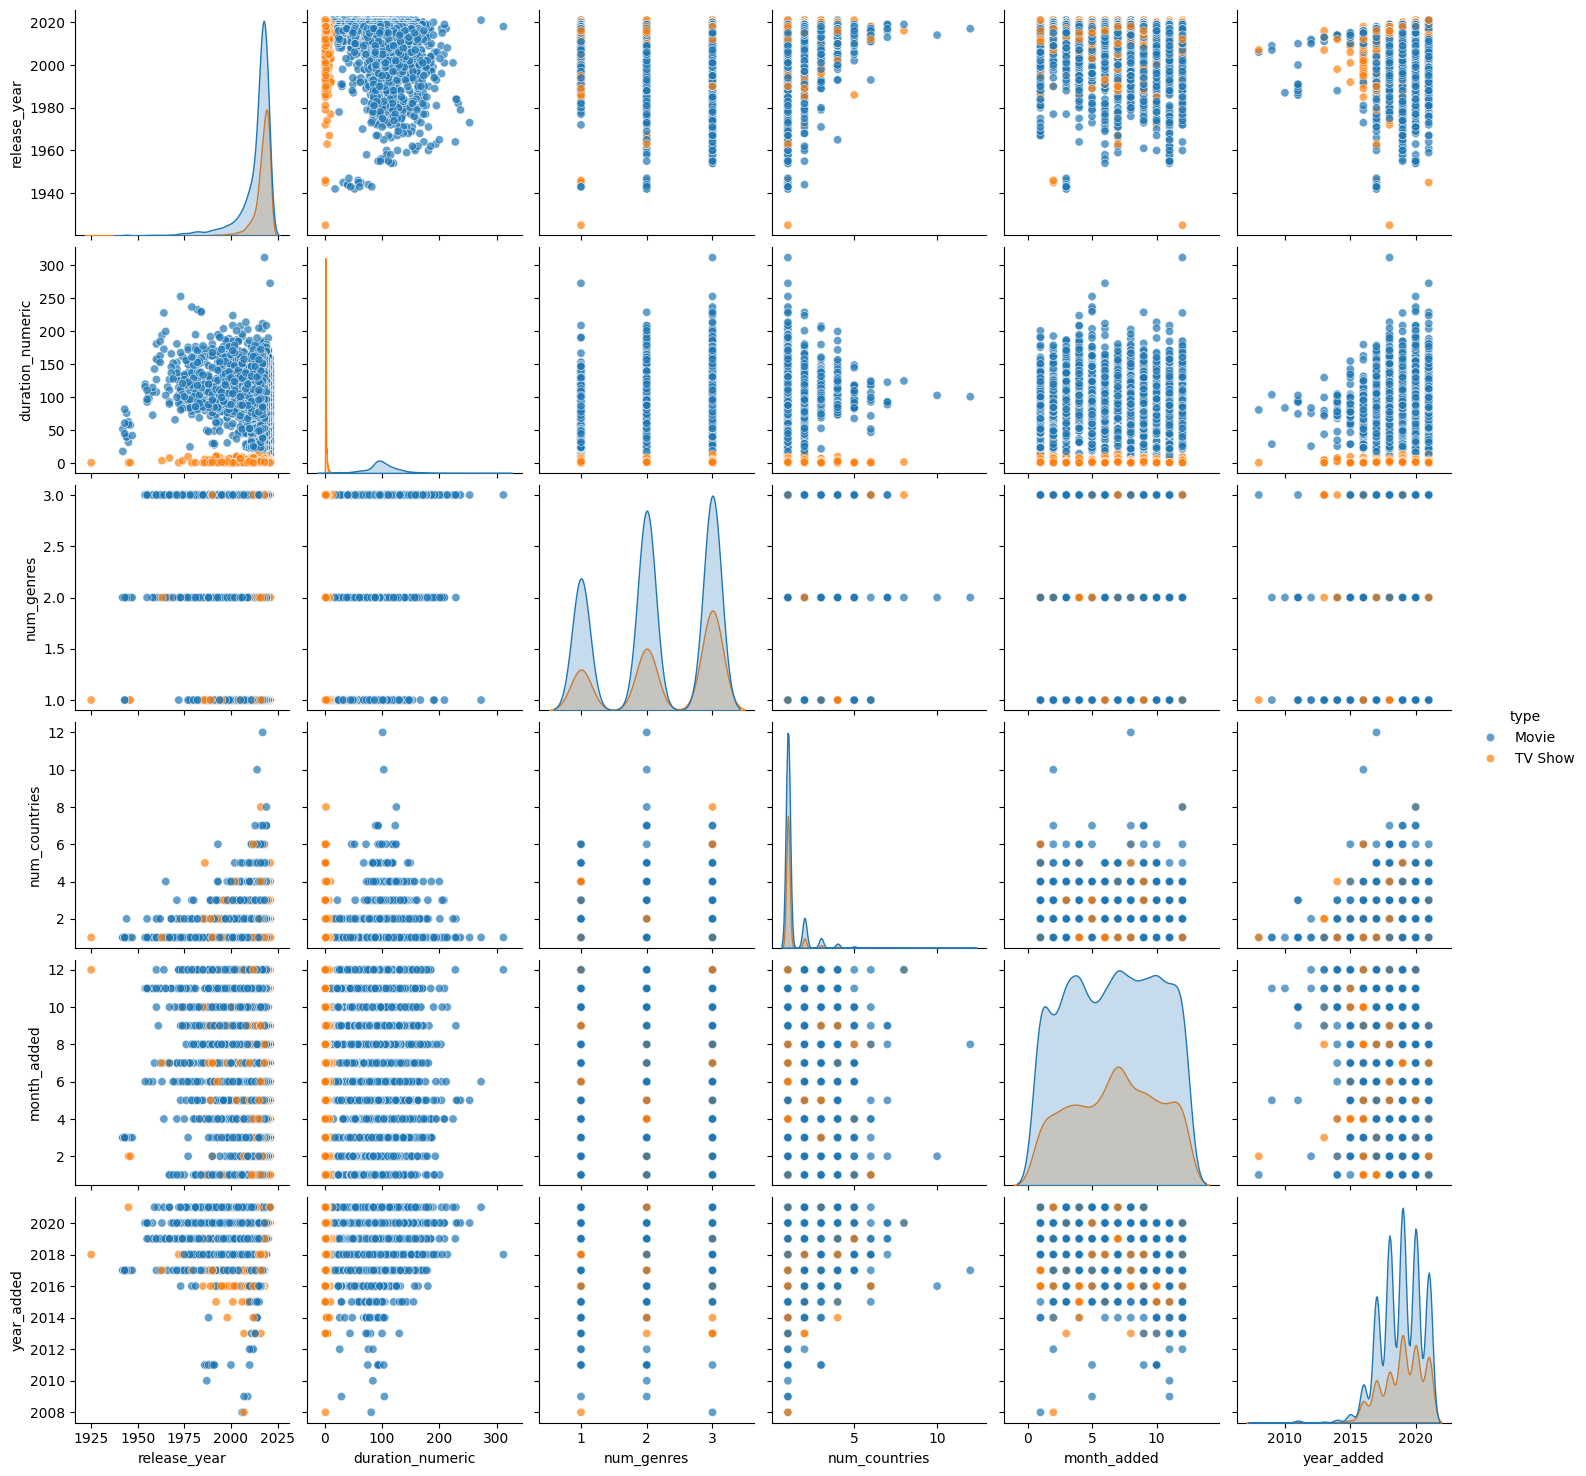

In [42]:
sns.pairplot(df, hue='type', diag_kind='kde', plot_kws={"alpha": 0.7})


In [44]:
sns.heatmap(df.corr(),cmap='coolwarm',annot = 'True')
plt.show()

ValueError: could not convert string to float: 's1'